In [1]:
import numpy as np

## Prob 3

In [23]:
uniq_sample_list = []
sample_list
epochs = 500
for epoch in range(epochs):
    samples = np.random.choice(range(1,5), 5)
    if set(samples) not in uniq_sample_list:
        uniq_sample_list.append(set(samples))

In [24]:
uniq_sample_list

[{2, 3, 4},
 {1, 4},
 {1, 2, 3, 4},
 {1, 2, 4},
 {1, 3, 4},
 {2, 3},
 {1, 2, 3},
 {1, 3},
 {2, 4},
 {3, 4},
 {2},
 {3},
 {1, 2},
 {4}]

In [25]:
print(len(uniq_sample_list))

14


## Prob 10

In [2]:
def decision_stumps(s, theta, x):
    if x-theta > 0:
        x_sign = 1
    else:
        x_sign = -1
    
    return s * x_sign

In [4]:
N_SAMPLES = 32
N_EXPS = 2000

best_errs, best_hs = [], []
for epoch in range(N_EXPS):
    # Generate data
    samples = np.random.uniform(-1, 1, N_SAMPLES)
    
    # Sorting
    samples = np.sort(samples)
    
    # Get label + noise
    noise_ids = np.random.choice(N_SAMPLES, int(N_SAMPLES * 0.1))
    labels = []
    for i, sample in enumerate(samples):
        label = 1 if sample > 0 else -1
        
        # flip due to noise
        if i in noise_ids:
            label *= -1
            
        labels.append(label)
    
    # Get thetas
    thetas = [-1]
    for i in range(len(samples)):
        if i+1 >= N_SAMPLES:
            break
        x, x_next = samples[i], samples[i+1]
        thetas.append((x_next + x)/ 2)
    
    # Caculate ein for each hypothesis
    best_error, best_h = (np.inf, np.inf), None
    for s in [-1, 1]:
        for theta in thetas:
            eout = 0.5 - 0.4 * s + 0.4 * s * abs(theta)
            n_ein = 0
            for sample, label in zip(samples, labels):
                pred = decision_stumps(s, theta, sample)
                if pred != label:
                    n_ein += 1
                    
            ein = n_ein / N_SAMPLES
            if ein < best_error[0]:
                best_error = (ein, eout)
                best_h = (s, theta)
            #print("Ein:{} Hypothesis Parameter:{}".format(n_ein, (s, theta)))
    print("Epoch:{} Ein:{} Hypothesis Parameter:{}".format(epoch, best_error, best_h))
    
    # Save best hypothesis parameter
    best_errs.append(best_error)
    best_hs.append(best_h)

Epoch:0 Ein:(0.09375, 0.10150311895993258) Hypothesis Parameter:(1, -0.0037577973998315084)
Epoch:1 Ein:(0.09375, 0.12471754628041973) Hypothesis Parameter:(1, -0.06179386570104939)
Epoch:2 Ein:(0.0625, 0.11033565908457074) Hypothesis Parameter:(1, 0.025839147711426924)
Epoch:3 Ein:(0.09375, 0.10586533714846554) Hypothesis Parameter:(1, -0.014663342871163887)
Epoch:4 Ein:(0.09375, 0.11705900449226506) Hypothesis Parameter:(1, 0.04264751123066268)
Epoch:5 Ein:(0.0625, 0.13818883458482015) Hypothesis Parameter:(1, -0.09547208646205041)
Epoch:6 Ein:(0.09375, 0.11053853758365333) Hypothesis Parameter:(1, -0.026346343959133378)
Epoch:7 Ein:(0.09375, 0.11751818875849282) Hypothesis Parameter:(1, -0.04379547189623212)
Epoch:8 Ein:(0.09375, 0.139322275643718) Hypothesis Parameter:(1, 0.09830568910929505)
Epoch:9 Ein:(0.03125, 0.13159787340817222) Hypothesis Parameter:(1, -0.0789946835204306)
Epoch:10 Ein:(0.09375, 0.10056964226235435) Hypothesis Parameter:(1, -0.00142410565588591)
Epoch:11 Ein

Epoch:215 Ein:(0.0625, 0.13490714582618454) Hypothesis Parameter:(1, 0.08726786456546143)
Epoch:216 Ein:(0.0625, 0.10513920037309774) Hypothesis Parameter:(1, -0.012848000932744408)
Epoch:217 Ein:(0.09375, 0.11666677422532346) Hypothesis Parameter:(1, -0.041666935563308694)
Epoch:218 Ein:(0.09375, 0.10119121045493526) Hypothesis Parameter:(1, -0.002978026137338219)
Epoch:219 Ein:(0.09375, 0.10281300396392504) Hypothesis Parameter:(1, -0.007032509909812634)
Epoch:220 Ein:(0.0625, 0.10194736557865773) Hypothesis Parameter:(1, 0.00486841394664439)
Epoch:221 Ein:(0.03125, 0.19073673410385442) Hypothesis Parameter:(1, -0.22684183525963608)
Epoch:222 Ein:(0.09375, 0.10345688025499825) Hypothesis Parameter:(1, -0.008642200637495656)
Epoch:223 Ein:(0.0625, 0.10350413458078338) Hypothesis Parameter:(1, -0.008760336451958506)
Epoch:224 Ein:(0.09375, 0.12445716056973806) Hypothesis Parameter:(1, 0.0611429014243452)
Epoch:225 Ein:(0.09375, 0.10647041035280244) Hypothesis Parameter:(1, -0.016176025

Epoch:469 Ein:(0.09375, 0.10084126660216668) Hypothesis Parameter:(1, -0.0021031665054167537)
Epoch:470 Ein:(0.0625, 0.1293073831099142) Hypothesis Parameter:(1, -0.07326845777478552)
Epoch:471 Ein:(0.09375, 0.1004445947352705) Hypothesis Parameter:(1, 0.001111486838176301)
Epoch:472 Ein:(0.09375, 0.10104585563776977) Hypothesis Parameter:(1, -0.002614639094424498)
Epoch:473 Ein:(0.0625, 0.11412294169212445) Hypothesis Parameter:(1, -0.03530735423031117)
Epoch:474 Ein:(0.09375, 0.2315409189560481) Hypothesis Parameter:(1, -0.32885229739012023)
Epoch:475 Ein:(0.09375, 0.1261753129911108) Hypothesis Parameter:(1, -0.06543828247777705)
Epoch:476 Ein:(0.09375, 0.10586923433271037) Hypothesis Parameter:(1, 0.014673085831775956)
Epoch:477 Ein:(0.09375, 0.13146631393730324) Hypothesis Parameter:(1, -0.07866578484325815)
Epoch:478 Ein:(0.09375, 0.10013031914131705) Hypothesis Parameter:(1, 0.0003257978532926753)
Epoch:479 Ein:(0.09375, 0.10161892013292355) Hypothesis Parameter:(1, -0.004047300

Epoch:619 Ein:(0.09375, 0.10160273364942236) Hypothesis Parameter:(1, -0.004006834123555958)
Epoch:620 Ein:(0.09375, 0.10837092579986585) Hypothesis Parameter:(1, -0.020927314499664673)
Epoch:621 Ein:(0.09375, 0.14161967940047246) Hypothesis Parameter:(1, -0.10404919850118122)
Epoch:622 Ein:(0.09375, 0.18863495464924857) Hypothesis Parameter:(1, -0.2215873866231215)
Epoch:623 Ein:(0.09375, 0.10782882000896607) Hypothesis Parameter:(1, -0.019572050022415244)
Epoch:624 Ein:(0.09375, 0.10099949383639768) Hypothesis Parameter:(1, -0.002498734590994256)
Epoch:625 Ein:(0.0625, 0.13563041895598527) Hypothesis Parameter:(1, 0.08907604738996322)
Epoch:626 Ein:(0.0625, 0.10596228837423369) Hypothesis Parameter:(1, -0.014905720935584288)
Epoch:627 Ein:(0.09375, 0.11698611363563012) Hypothesis Parameter:(1, 0.04246528408907535)
Epoch:628 Ein:(0.09375, 0.11419511105648084) Hypothesis Parameter:(1, 0.035487777641202145)
Epoch:629 Ein:(0.09375, 0.1072777978207377) Hypothesis Parameter:(1, -0.01819449

Epoch:755 Ein:(0.09375, 0.12609785318470473) Hypothesis Parameter:(1, 0.06524463296176186)
Epoch:756 Ein:(0.0625, 0.11466785576366759) Hypothesis Parameter:(1, -0.03666963940916901)
Epoch:757 Ein:(0.09375, 0.13794440040214637) Hypothesis Parameter:(1, 0.09486100100536599)
Epoch:758 Ein:(0.09375, 0.13068446152243388) Hypothesis Parameter:(1, -0.07671115380608473)
Epoch:759 Ein:(0.09375, 0.10748452435762286) Hypothesis Parameter:(1, 0.018711310894057198)
Epoch:760 Ein:(0.0625, 0.12609756805970632) Hypothesis Parameter:(1, 0.06524392014926583)
Epoch:761 Ein:(0.09375, 0.11427843789556687) Hypothesis Parameter:(1, -0.03569609473891722)
Epoch:762 Ein:(0.09375, 0.1321559053958201) Hypothesis Parameter:(1, 0.08038976348955029)
Epoch:763 Ein:(0.09375, 0.10107145235932517) Hypothesis Parameter:(1, 0.0026786308983129947)
Epoch:764 Ein:(0.09375, 0.10018949553714565) Hypothesis Parameter:(1, 0.0004737388428641687)
Epoch:765 Ein:(0.09375, 0.1320611125957263) Hypothesis Parameter:(1, -0.0801527814893

Epoch:884 Ein:(0.0625, 0.10515125234789739) Hypothesis Parameter:(1, -0.012878130869743543)
Epoch:885 Ein:(0.0625, 0.14835332423073055) Hypothesis Parameter:(1, 0.12088331057682644)
Epoch:886 Ein:(0.09375, 0.10313157890450501) Hypothesis Parameter:(1, -0.007828947261262598)
Epoch:887 Ein:(0.0625, 0.10460502844877236) Hypothesis Parameter:(1, -0.011512571121930937)
Epoch:888 Ein:(0.09375, 0.1119621489607314) Hypothesis Parameter:(1, 0.029905372401828556)
Epoch:889 Ein:(0.09375, 0.10059119598002104) Hypothesis Parameter:(1, 0.0014779899500526605)
Epoch:890 Ein:(0.09375, 0.13892386987673258) Hypothesis Parameter:(1, -0.0973096746918315)
Epoch:891 Ein:(0.09375, 0.1277759909704123) Hypothesis Parameter:(1, -0.06943997742603081)
Epoch:892 Ein:(0.09375, 0.10379223838136722) Hypothesis Parameter:(1, 0.009480595953418103)
Epoch:893 Ein:(0.0625, 0.15250071931121212) Hypothesis Parameter:(1, -0.13125179827803035)
Epoch:894 Ein:(0.0625, 0.1270276281649114) Hypothesis Parameter:(1, 0.06756907041227

Epoch:1022 Ein:(0.09375, 0.10181743699982701) Hypothesis Parameter:(1, -0.004543592499567595)
Epoch:1023 Ein:(0.09375, 0.10575916759367081) Hypothesis Parameter:(1, -0.014397918984177083)
Epoch:1024 Ein:(0.09375, 0.10543694716460912) Hypothesis Parameter:(1, -0.013592367911522851)
Epoch:1025 Ein:(0.09375, 0.10589120228360585) Hypothesis Parameter:(1, -0.014728005709014669)
Epoch:1026 Ein:(0.0625, 0.11264794774494787) Hypothesis Parameter:(1, -0.03161986936236971)
Epoch:1027 Ein:(0.09375, 0.10209616067696754) Hypothesis Parameter:(1, 0.005240401692418906)
Epoch:1028 Ein:(0.0625, 0.10640184758842833) Hypothesis Parameter:(1, -0.01600461897107086)
Epoch:1029 Ein:(0.09375, 0.10760101808589033) Hypothesis Parameter:(1, -0.019002545214725886)
Epoch:1030 Ein:(0.09375, 0.144158070427902) Hypothesis Parameter:(1, 0.11039517606975502)
Epoch:1031 Ein:(0.09375, 0.18327068775292754) Hypothesis Parameter:(1, -0.20817671938231885)
Epoch:1032 Ein:(0.09375, 0.10102172968562957) Hypothesis Parameter:(1,

Epoch:1147 Ein:(0.09375, 0.11308518217841679) Hypothesis Parameter:(1, 0.032712955446042025)
Epoch:1148 Ein:(0.0625, 0.15259769185216768) Hypothesis Parameter:(1, 0.13149422963041923)
Epoch:1149 Ein:(0.09375, 0.11644016301643434) Hypothesis Parameter:(1, -0.041100407541085904)
Epoch:1150 Ein:(0.0625, 0.1847698655928945) Hypothesis Parameter:(1, 0.2119246639822363)
Epoch:1151 Ein:(0.0625, 0.11614798025535807) Hypothesis Parameter:(1, 0.04036995063839521)
Epoch:1152 Ein:(0.09375, 0.10538450582458306) Hypothesis Parameter:(1, -0.013461264561457686)
Epoch:1153 Ein:(0.0625, 0.10807747554229878) Hypothesis Parameter:(1, -0.020193688855747016)
Epoch:1154 Ein:(0.0625, 0.1309503411574349) Hypothesis Parameter:(1, -0.07737585289358728)
Epoch:1155 Ein:(0.0625, 0.14441265169326184) Hypothesis Parameter:(1, -0.11103162923315468)
Epoch:1156 Ein:(0.09375, 0.11755169305445398) Hypothesis Parameter:(1, 0.043879232636135024)
Epoch:1157 Ein:(0.09375, 0.10523921321332914) Hypothesis Parameter:(1, -0.01309

Epoch:1303 Ein:(0.09375, 0.10165948836750649) Hypothesis Parameter:(1, -0.00414872091876628)
Epoch:1304 Ein:(0.09375, 0.10324996057468902) Hypothesis Parameter:(1, 0.00812490143672262)
Epoch:1305 Ein:(0.09375, 0.10657282753940736) Hypothesis Parameter:(1, -0.016432068848518444)
Epoch:1306 Ein:(0.09375, 0.10013221068898955) Hypothesis Parameter:(1, -0.0003305267224739117)
Epoch:1307 Ein:(0.09375, 0.10429679066436573) Hypothesis Parameter:(1, -0.010741976660914365)
Epoch:1308 Ein:(0.0625, 0.18293315555390557) Hypothesis Parameter:(1, -0.20733288888476398)
Epoch:1309 Ein:(0.09375, 0.10032503442846952) Hypothesis Parameter:(1, 0.0008125860711738486)
Epoch:1310 Ein:(0.0625, 0.13761555835288358) Hypothesis Parameter:(1, 0.09403889588220904)
Epoch:1311 Ein:(0.09375, 0.10662689163629324) Hypothesis Parameter:(1, -0.01656722909073316)
Epoch:1312 Ein:(0.09375, 0.10995236596560029) Hypothesis Parameter:(1, -0.024880914914000796)
Epoch:1313 Ein:(0.09375, 0.10316802828494118) Hypothesis Parameter:(

Epoch:1512 Ein:(0.09375, 0.11862963409970388) Hypothesis Parameter:(1, -0.04657408524925977)
Epoch:1513 Ein:(0.09375, 0.10509658848916466) Hypothesis Parameter:(1, 0.012741471222911693)
Epoch:1514 Ein:(0.0625, 0.15371789442045355) Hypothesis Parameter:(1, -0.13429473605113396)
Epoch:1515 Ein:(0.0625, 0.1438573916293817) Hypothesis Parameter:(1, 0.10964347907345429)
Epoch:1516 Ein:(0.0625, 0.1341425011574449) Hypothesis Parameter:(1, 0.08535625289361226)
Epoch:1517 Ein:(0.09375, 0.1380627593147682) Hypothesis Parameter:(1, -0.09515689828692053)
Epoch:1518 Ein:(0.09375, 0.1135235375055901) Hypothesis Parameter:(1, -0.033808843763975305)
Epoch:1519 Ein:(0.09375, 0.11066753019424114) Hypothesis Parameter:(1, 0.0266688254856029)
Epoch:1520 Ein:(0.09375, 0.11099797372699219) Hypothesis Parameter:(1, 0.027494934317480513)
Epoch:1521 Ein:(0.09375, 0.10598862379407137) Hypothesis Parameter:(1, 0.014971559485178476)
Epoch:1522 Ein:(0.0625, 0.1230891209226203) Hypothesis Parameter:(1, -0.05772280

Epoch:1729 Ein:(0.09375, 0.10013495599239904) Hypothesis Parameter:(1, -0.00033738998099763773)
Epoch:1730 Ein:(0.09375, 0.11152203702007066) Hypothesis Parameter:(1, 0.028805092550176714)
Epoch:1731 Ein:(0.09375, 0.19050855722487975) Hypothesis Parameter:(1, -0.22627139306219946)
Epoch:1732 Ein:(0.0625, 0.11948105036458434) Hypothesis Parameter:(1, -0.048702625911460906)
Epoch:1733 Ein:(0.09375, 0.1259719735559797) Hypothesis Parameter:(1, -0.06492993388994928)
Epoch:1734 Ein:(0.09375, 0.10825527367362568) Hypothesis Parameter:(1, 0.020638184184064268)
Epoch:1735 Ein:(0.09375, 0.10351615679089703) Hypothesis Parameter:(1, -0.008790391977242629)
Epoch:1736 Ein:(0.09375, 0.10535750195278755) Hypothesis Parameter:(1, -0.013393754881968922)
Epoch:1737 Ein:(0.09375, 0.10784522714057776) Hypothesis Parameter:(1, -0.019613067851444455)
Epoch:1738 Ein:(0.09375, 0.20549974926634051) Hypothesis Parameter:(1, -0.26374937316585134)
Epoch:1739 Ein:(0.0625, 0.13330016481118928) Hypothesis Parameter

### Plot a scatter plot of (ein(g), eout(g))

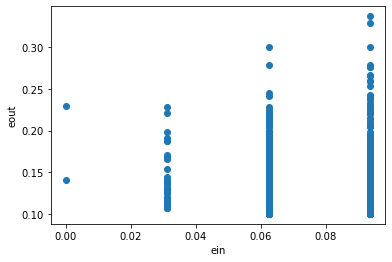

In [6]:
import matplotlib.pyplot as plt

best_eins = [best_err[0] for best_err in best_errs]
best_eouts = [best_err[1] for best_err in best_errs]

plt.scatter(best_eins, best_eouts)
plt.xlabel("ein")
plt.ylabel("eout")
plt.show()

### Calculate the median of Eout(g) − Ein(g)

In [7]:
costs = np.array([])
for ein, eout in zip(best_eins, best_eouts):
    costs = np.append(costs, eout - ein)

np.median(costs, axis=0)

0.023338267157456044

## Prob 11

In [8]:
def decision_stumps(s, theta, x):
    if x-theta > 0:
        x_sign = 1
    else:
        x_sign = -1
    
    return s * x_sign

In [9]:
N_SAMPLES = 8
N_EXPS = 2000

best_errs, best_hs = [], []
for epoch in range(N_EXPS):
    # Generate data
    samples = np.random.uniform(-1, 1, N_SAMPLES)
    
    # Sorting
    samples = np.sort(samples)
    
    # Get label + noise
    noise_ids = np.random.choice(N_SAMPLES, int(N_SAMPLES * 0.1))
    labels = []
    for i, sample in enumerate(samples):
        label = 1 if sample > 0 else -1
        
        # flip due to noise
        if i in noise_ids:
            label *= -1
            
        labels.append(label)
    
    # Get thetas
    thetas = [-1]
    for i in range(len(samples)):
        if i+1 >= N_SAMPLES:
            break
        x, x_next = samples[i], samples[i+1]
        thetas.append((x_next + x)/ 2)
    
    # Caculate ein for each hypothesis
    best_error, best_h = (np.inf, np.inf), (s, theta)
    for s in [-1, 1]:
        for theta in thetas:
            eout = 0.5 - 0.4 * s + 0.4 * s * abs(theta)
            n_ein = 0
            for sample, label in zip(samples, labels):
                pred = decision_stumps(s, theta, sample)
                if pred != label:
                    n_ein += 1
                    
            ein = n_ein / N_SAMPLES
            if ein < best_error[0]:
                best_error = (ein, eout)
                best_h = (s, theta)
            #print("Ein:{} Hypothesis Parameter:{}".format(n_ein, (s, theta)))

    print("Epoch:{} Ein:{} Hypothesis Parameter:{}".format(epoch, best_error, best_h))
    
    # Save best hypothesis parameter
    best_errs.append(best_error)
    best_hs.append(best_h)

Epoch:0 Ein:(0.0, 0.14633380052262862) Hypothesis Parameter:(1, -0.11583450130657158)
Epoch:1 Ein:(0.0, 0.18911106697756935) Hypothesis Parameter:(1, -0.22277766744392347)
Epoch:2 Ein:(0.0, 0.10940320116293771) Hypothesis Parameter:(1, 0.02350800290734434)
Epoch:3 Ein:(0.0, 0.2716362771410702) Hypothesis Parameter:(1, -0.42909069285267554)
Epoch:4 Ein:(0.0, 0.17716144513496057) Hypothesis Parameter:(1, -0.19290361283740143)
Epoch:5 Ein:(0.0, 0.1430592489890673) Hypothesis Parameter:(1, 0.1076481224726683)
Epoch:6 Ein:(0.0, 0.18827554753261205) Hypothesis Parameter:(1, -0.22068886883153016)
Epoch:7 Ein:(0.0, 0.22289332728898809) Hypothesis Parameter:(1, -0.30723331822247024)
Epoch:8 Ein:(0.0, 0.15639323305566785) Hypothesis Parameter:(1, -0.1409830826391697)
Epoch:9 Ein:(0.0, 0.10296787166787114) Hypothesis Parameter:(1, -0.007419679169677895)
Epoch:10 Ein:(0.0, 0.1149897913104857) Hypothesis Parameter:(1, -0.03747447827621431)
Epoch:11 Ein:(0.0, 0.10565802448366826) Hypothesis Paramete

Epoch:634 Ein:(0.0, 0.14233842851521492) Hypothesis Parameter:(1, 0.10584607128803736)
Epoch:635 Ein:(0.0, 0.1559792487125679) Hypothesis Parameter:(1, 0.1399481217814198)
Epoch:636 Ein:(0.0, 0.16054637872892402) Hypothesis Parameter:(1, -0.15136594682231008)
Epoch:637 Ein:(0.0, 0.13628039335345485) Hypothesis Parameter:(1, 0.09070098338363719)
Epoch:638 Ein:(0.0, 0.13447256063908816) Hypothesis Parameter:(1, -0.08618140159772048)
Epoch:639 Ein:(0.0, 0.10252514180559388) Hypothesis Parameter:(1, 0.006312854513984778)
Epoch:640 Ein:(0.0, 0.10372644859355684) Hypothesis Parameter:(1, 0.009316121483892159)
Epoch:641 Ein:(0.0, 0.16593559892248239) Hypothesis Parameter:(1, 0.164838997306206)
Epoch:642 Ein:(0.0, 0.11796357211080533) Hypothesis Parameter:(1, -0.04490893027701337)
Epoch:643 Ein:(0.0, 0.14947875725121504) Hypothesis Parameter:(1, 0.12369689312803767)
Epoch:644 Ein:(0.0, 0.18297060999061704) Hypothesis Parameter:(1, 0.20742652497654268)
Epoch:645 Ein:(0.0, 0.16108080343612172) H

Epoch:1287 Ein:(0.0, 0.1058506071345221) Hypothesis Parameter:(1, 0.014626517836305308)
Epoch:1288 Ein:(0.0, 0.14322787428387243) Hypothesis Parameter:(1, -0.10806968570968112)
Epoch:1289 Ein:(0.0, 0.13301594754492718) Hypothesis Parameter:(1, 0.08253986886231801)
Epoch:1290 Ein:(0.0, 0.11586874835814324) Hypothesis Parameter:(1, 0.039671870895358174)
Epoch:1291 Ein:(0.0, 0.1144578754907758) Hypothesis Parameter:(1, -0.036144688726939544)
Epoch:1292 Ein:(0.0, 0.2699628525447275) Hypothesis Parameter:(1, -0.4249071313618188)
Epoch:1293 Ein:(0.0, 0.1290614245741941) Hypothesis Parameter:(1, -0.07265356143548529)
Epoch:1294 Ein:(0.0, 0.18163272296239724) Hypothesis Parameter:(1, -0.20408180740599313)
Epoch:1295 Ein:(0.0, 0.1565499407572612) Hypothesis Parameter:(1, -0.14137485189315302)
Epoch:1296 Ein:(0.0, 0.11256946184014678) Hypothesis Parameter:(1, 0.031423654600367)
Epoch:1297 Ein:(0.0, 0.11503532206216523) Hypothesis Parameter:(1, 0.037588305155413115)
Epoch:1298 Ein:(0.0, 0.1508255

Epoch:1900 Ein:(0.0, 0.13312207645879368) Hypothesis Parameter:(1, -0.08280519114698426)
Epoch:1901 Ein:(0.0, 0.1303291204894181) Hypothesis Parameter:(1, -0.07582280122354534)
Epoch:1902 Ein:(0.0, 0.15073307938998765) Hypothesis Parameter:(1, 0.12683269847496914)
Epoch:1903 Ein:(0.0, 0.11526074840828449) Hypothesis Parameter:(1, -0.03815187102071127)
Epoch:1904 Ein:(0.0, 0.18756332724894198) Hypothesis Parameter:(1, 0.218908318122355)
Epoch:1905 Ein:(0.0, 0.11712388031820187) Hypothesis Parameter:(1, 0.042809700795504724)
Epoch:1906 Ein:(0.0, 0.13706201045063565) Hypothesis Parameter:(1, -0.09265502612658916)
Epoch:1907 Ein:(0.0, 0.11945161828539533) Hypothesis Parameter:(1, 0.04862904571348836)
Epoch:1908 Ein:(0.0, 0.10322946491024483) Hypothesis Parameter:(1, -0.008073662275612126)
Epoch:1909 Ein:(0.0, 0.11458369979174143) Hypothesis Parameter:(1, 0.03645924947935364)
Epoch:1910 Ein:(0.0, 0.14499919131799122) Hypothesis Parameter:(1, 0.1124979782949781)
Epoch:1911 Ein:(0.0, 0.121115

### Plot a scatter plot of (ein(g), eout(g))

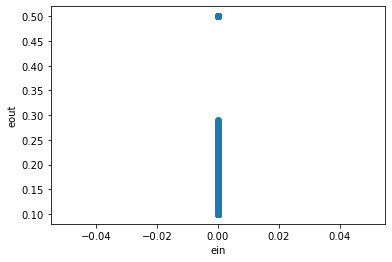

In [10]:
import matplotlib.pyplot as plt

best_eins = [best_err[0] for best_err in best_errs]
best_eouts = [best_err[1] for best_err in best_errs]

plt.scatter(best_eins, best_eouts)
plt.xlabel("ein")
plt.ylabel("eout")
plt.show()

### Calculate the median of Eout(g) − Ein(g)

In [11]:
costs = np.array([])
for ein, eout in zip(best_eins, best_eouts):
    costs = np.append(costs, eout - ein)

np.median(costs, axis=0)

0.1322171156279302

## Prob 12

In [12]:
def decision_stumps(s, theta, x):
    if x-theta > 0:
        x_sign = 1
    else:
        x_sign = -1
    
    return s * x_sign

In [13]:
N_SAMPLES = 8
N_EXPS = 2000

best_errs, best_hs = [], []
for epoch in range(N_EXPS):
    # Generate data
    samples = np.random.uniform(-1, 1, N_SAMPLES)
    
    # Sorting
    samples = np.sort(samples)
    
    # Get label + noise
    noise_ids = np.random.choice(N_SAMPLES, int(N_SAMPLES * 0.1))
    labels = []
    for i, sample in enumerate(samples):
        label = 1 if sample > 0 else -1
        
        # flip due to noise
        if i in noise_ids:
            label *= -1
            
        labels.append(label)
    
    # Get thetas
    s = np.random.choice([-1, 1], 1)[0]
    theta = np.random.uniform(-1, 1, 1)[0]

    # Caculate ein for each hypothesis
    best_error, best_h = (np.inf, np.inf), (s, theta)
    eout = 0.5 - 0.4 * s + 0.4 * s * abs(theta)
    n_ein = 0
    for sample, label in zip(samples, labels):
        pred = decision_stumps(s, theta, sample)
        if pred != label:
            n_ein += 1
                    
    ein = n_ein / N_SAMPLES
    if ein < best_error[0]:
        best_error = (ein, eout)
        best_h = (s, theta)

    print("Epoch:{} Ein:{} Hypothesis Parameter:{}".format(epoch, best_error, best_h))
    
    # Save best hypothesis parameter
    best_errs.append(best_error)
    best_hs.append(best_h)

Epoch:0 Ein:(0.25, 0.41124862993176264) Hypothesis Parameter:(1, 0.7781215748294066)
Epoch:1 Ein:(0.125, 0.3027509769399194) Hypothesis Parameter:(1, 0.5068774423497986)
Epoch:2 Ein:(0.375, 0.34100082028183165) Hypothesis Parameter:(1, 0.6025020507045791)
Epoch:3 Ein:(0.125, 0.3229663631664083) Hypothesis Parameter:(1, 0.5574159079160208)
Epoch:4 Ein:(0.625, 0.41239935864601807) Hypothesis Parameter:(1, 0.7809983966150451)
Epoch:5 Ein:(0.75, 0.6603473596453496) Hypothesis Parameter:(-1, -0.5991316008866259)
Epoch:6 Ein:(1.0, 0.858173877424353) Hypothesis Parameter:(-1, -0.10456530643911743)
Epoch:7 Ein:(0.125, 0.5814059836293582) Hypothesis Parameter:(-1, -0.7964850409266044)
Epoch:8 Ein:(0.625, 0.6303157787406406) Hypothesis Parameter:(-1, -0.6742105531483986)
Epoch:9 Ein:(1.0, 0.6402140155184133) Hypothesis Parameter:(-1, 0.6494649612039667)
Epoch:10 Ein:(0.875, 0.8103680615754777) Hypothesis Parameter:(-1, 0.22407984606130582)
Epoch:11 Ein:(1.0, 0.7906230928857158) Hypothesis Parame

Epoch:748 Ein:(0.0, 0.10712582465569517) Hypothesis Parameter:(1, -0.017814561639238002)
Epoch:749 Ein:(0.375, 0.49141315918195405) Hypothesis Parameter:(1, 0.9785328979548851)
Epoch:750 Ein:(0.875, 0.8064283097426419) Hypothesis Parameter:(-1, 0.23392922564339536)
Epoch:751 Ein:(0.875, 0.5396868529629194) Hypothesis Parameter:(-1, -0.9007828675927014)
Epoch:752 Ein:(0.75, 0.637149923808838) Hypothesis Parameter:(-1, -0.6571251904779052)
Epoch:753 Ein:(0.125, 0.13295836805783387) Hypothesis Parameter:(1, -0.08239592014458474)
Epoch:754 Ein:(0.25, 0.29940290681866366) Hypothesis Parameter:(1, 0.49850726704665926)
Epoch:755 Ein:(0.25, 0.45946838004645174) Hypothesis Parameter:(1, 0.8986709501161294)
Epoch:756 Ein:(0.375, 0.3545944506112409) Hypothesis Parameter:(1, -0.6364861265281023)
Epoch:757 Ein:(0.375, 0.5446977693711705) Hypothesis Parameter:(-1, 0.8882555765720737)
Epoch:758 Ein:(0.875, 0.7200335436958865) Hypothesis Parameter:(-1, -0.44991614076028386)
Epoch:759 Ein:(0.125, 0.508

Epoch:1518 Ein:(0.25, 0.2503700148702667) Hypothesis Parameter:(1, -0.37592503717566683)
Epoch:1519 Ein:(0.875, 0.7724116640421443) Hypothesis Parameter:(-1, 0.31897083989463915)
Epoch:1520 Ein:(0.875, 0.7370734449064471) Hypothesis Parameter:(-1, 0.4073163877338821)
Epoch:1521 Ein:(0.625, 0.7047245228857114) Hypothesis Parameter:(-1, -0.4881886927857215)
Epoch:1522 Ein:(0.375, 0.5256044420608255) Hypothesis Parameter:(-1, -0.9359888948479362)
Epoch:1523 Ein:(0.875, 0.6980968806708577) Hypothesis Parameter:(-1, -0.5047577983228557)
Epoch:1524 Ein:(0.875, 0.6293479475305901) Hypothesis Parameter:(-1, -0.6766301311735248)
Epoch:1525 Ein:(1.0, 0.7567078726716525) Hypothesis Parameter:(-1, 0.3582303183208686)
Epoch:1526 Ein:(1.0, 0.8977685011153912) Hypothesis Parameter:(-1, 0.005578747211522073)
Epoch:1527 Ein:(0.5, 0.5643368275233336) Hypothesis Parameter:(-1, 0.8391579311916659)
Epoch:1528 Ein:(0.75, 0.5197671273703703) Hypothesis Parameter:(-1, 0.950582181574074)
Epoch:1529 Ein:(0.5, 0

### Plot a scatter plot of (ein(g), eout(g))

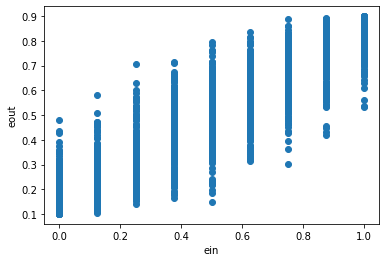

In [14]:
import matplotlib.pyplot as plt

best_eins = [best_err[0] for best_err in best_errs]
best_eouts = [best_err[1] for best_err in best_errs]

plt.scatter(best_eins, best_eouts)
plt.xlabel("ein")
plt.ylabel("eout")
plt.show()

### Calculate the median of Eout(g) − Ein(g)

In [15]:
costs = np.array([])
for ein, eout in zip(best_eins, best_eouts):
    costs = np.append(costs, eout - ein)

np.median(costs, axis=0)

0.00637335392449162